In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv('gym_churn_us.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [9]:
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [10]:
df['churn'].value_counts()

churn
0    2939
1    1061
Name: count, dtype: int64

In [11]:
from sklearn.utils import resample
minority = df[df['churn']==1]
majority = df[df['churn']==0]
minority_upsampled = resample(minority, replace=True, n_samples=2939, random_state=42)
df = pd.concat([majority, minority_upsampled])
df['churn'].value_counts()

churn
0    2939
1    2939
Name: count, dtype: int64

In [13]:
df.duplicated().value_counts()

False    3910
True     1968
Name: count, dtype: int64

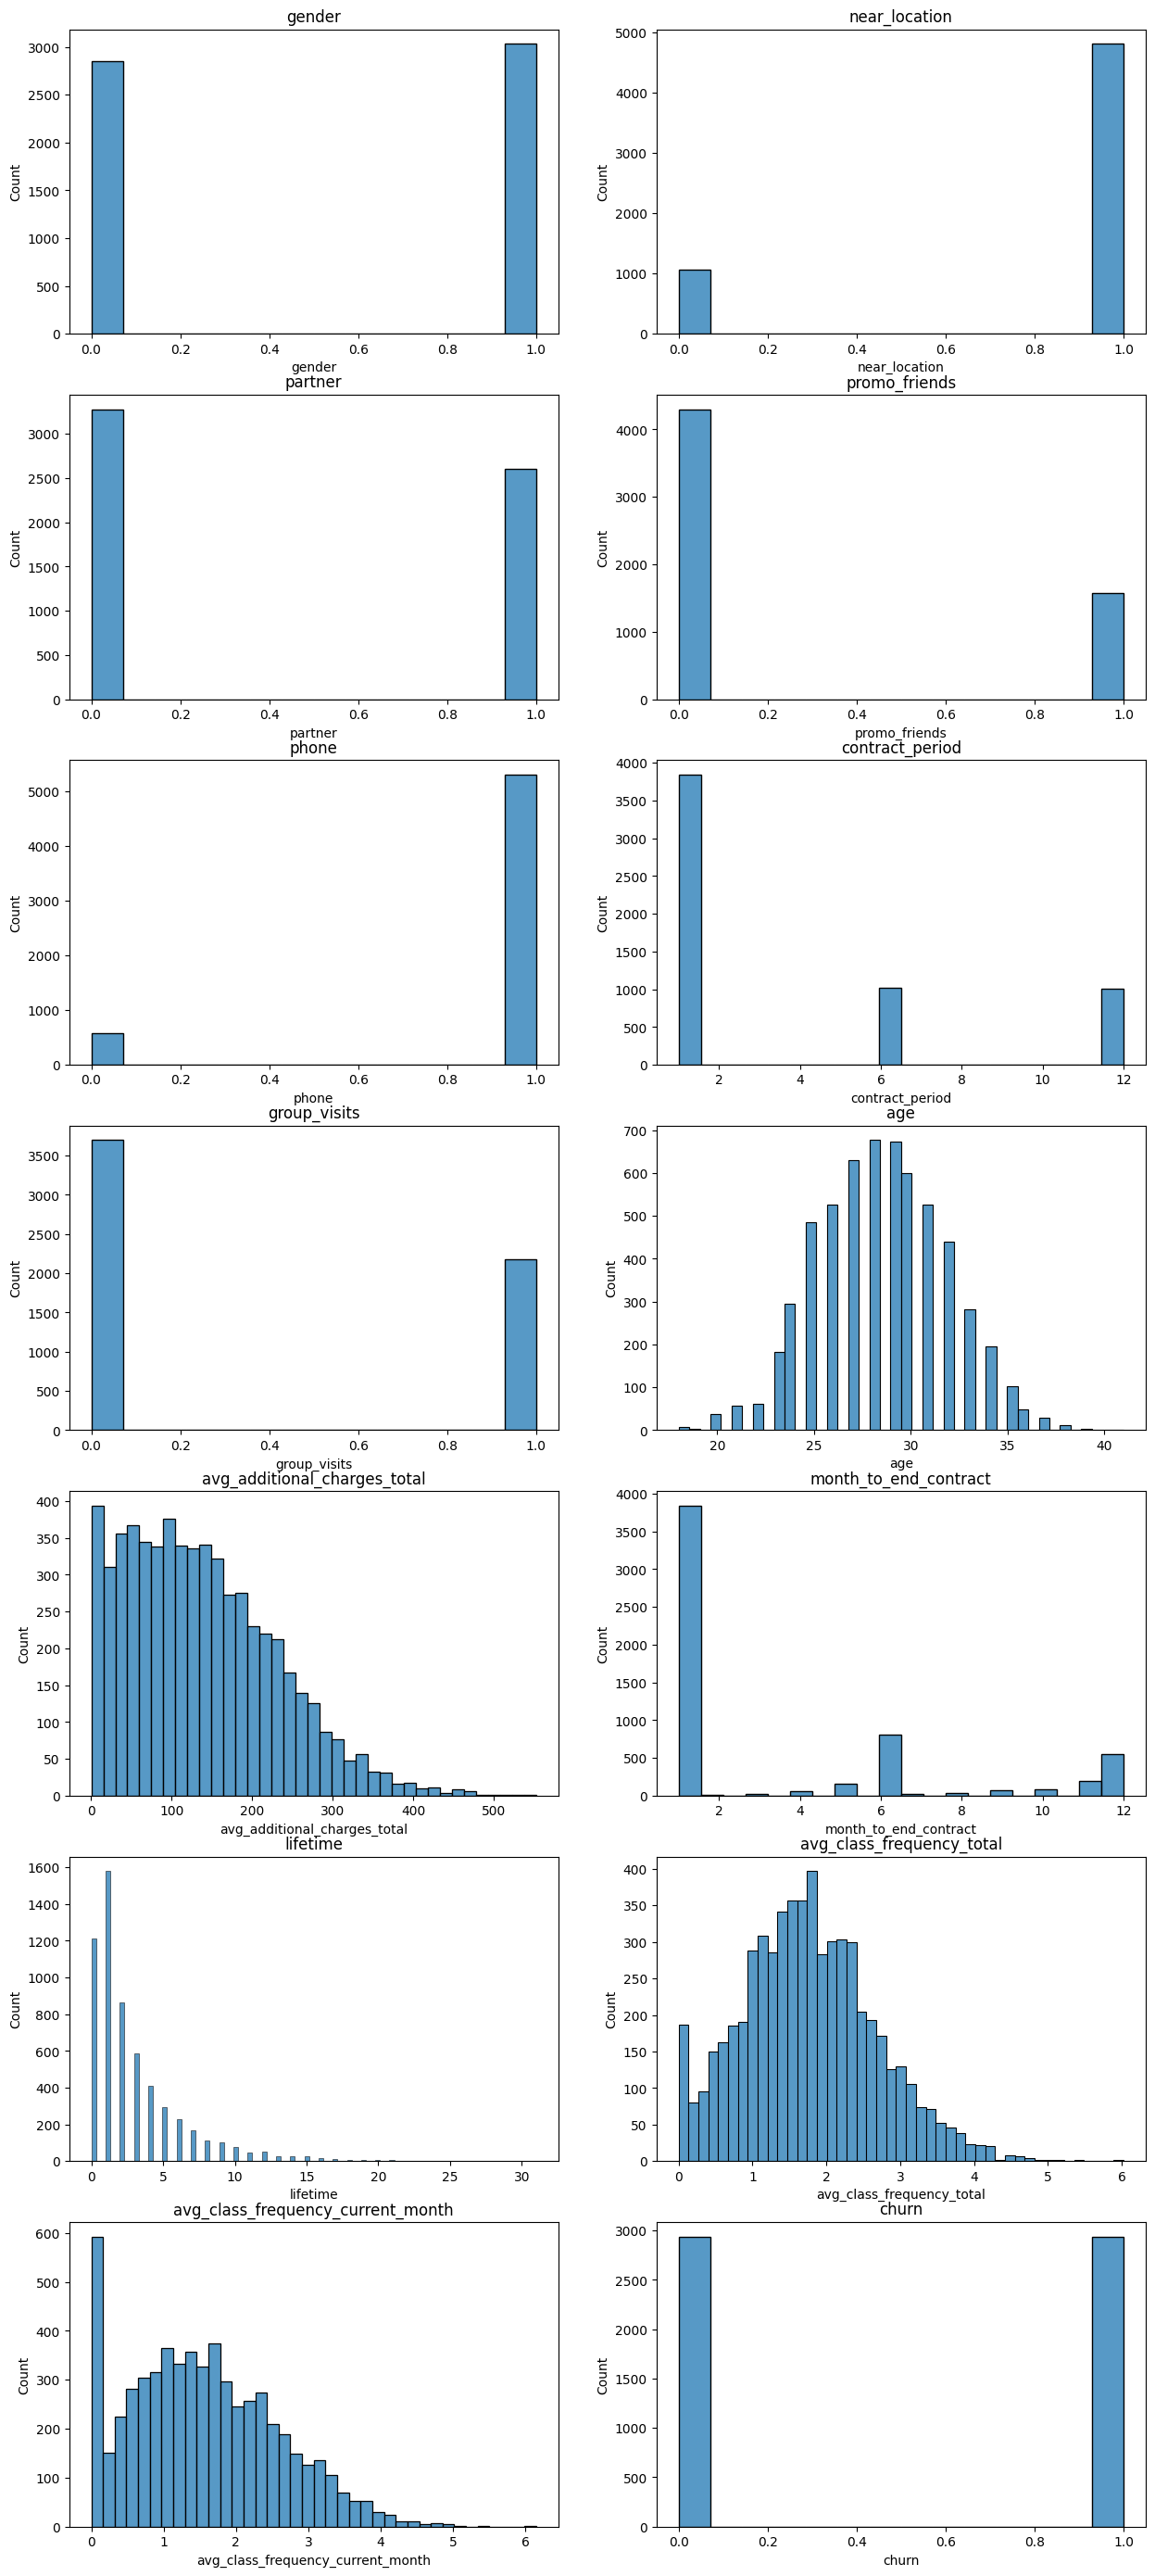

In [14]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(15, 5 * num_rows))
for i,col in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df[col])
    plt.title(col)

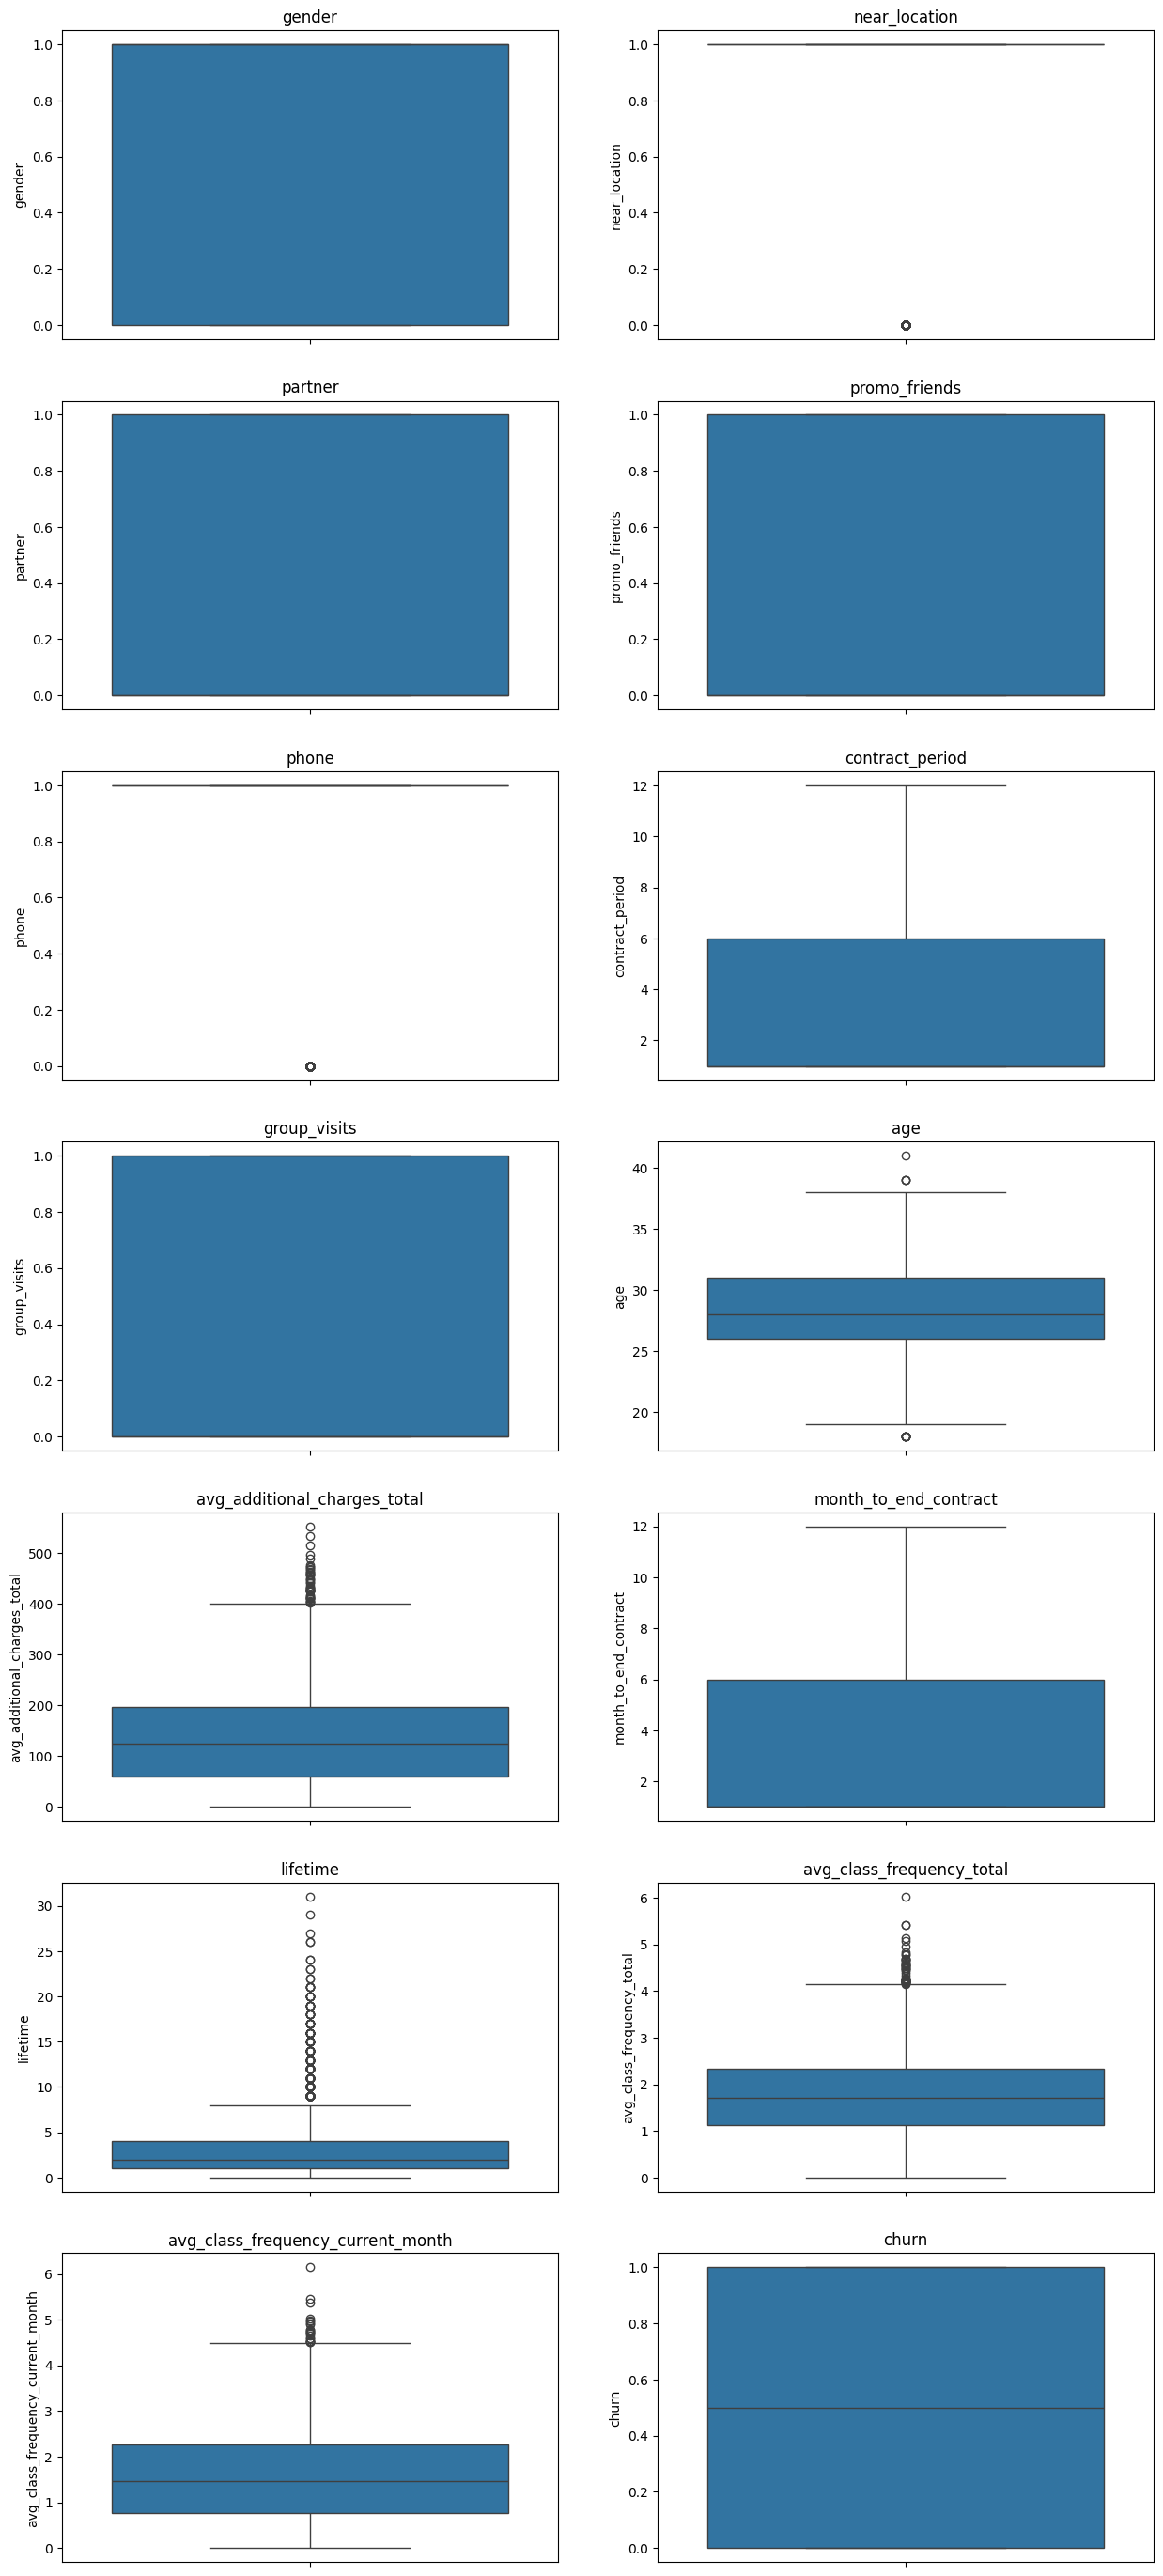

In [15]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(15, 5 * num_rows))
for i,col in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(df[col])
    plt.title(col)

In [16]:
df['lifetime'].unique()

array([ 3,  7,  2,  1, 11,  4,  8,  0, 14,  6,  5, 15, 12, 21, 10, 20,  9,
       13, 17, 16, 24, 22, 31, 26, 23, 18, 19, 27, 29], dtype=int64)

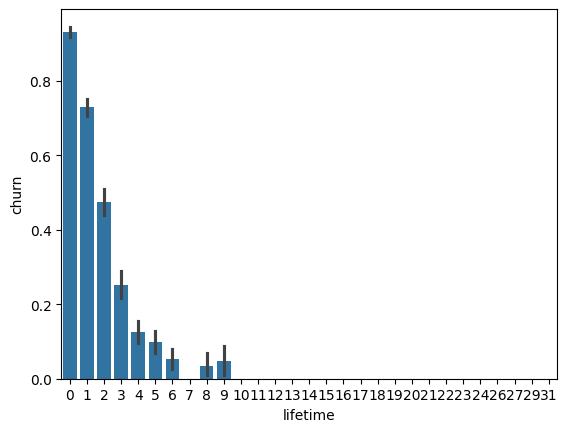

In [19]:
sns.barplot(x='lifetime', y='churn', data=df)
plt.show()

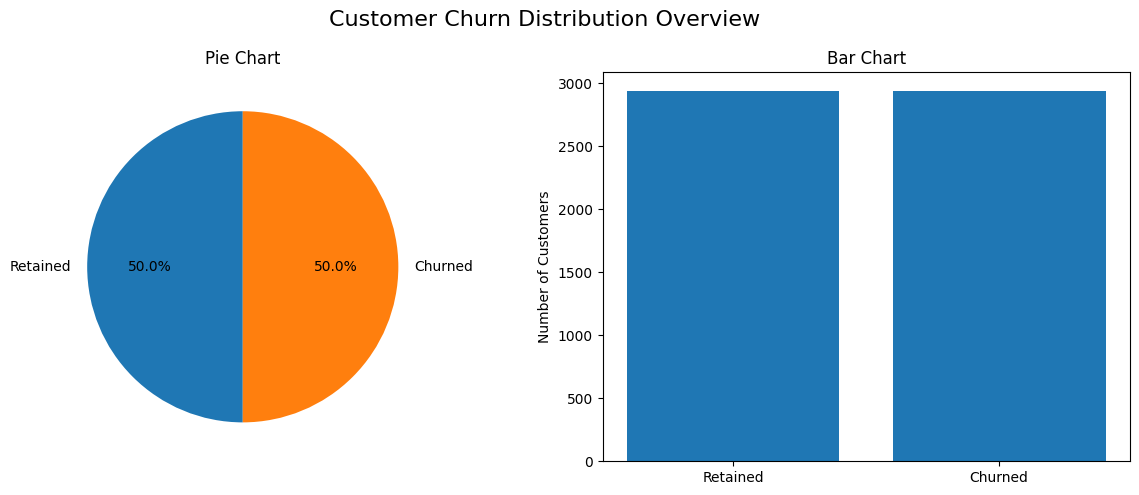

In [20]:
# Churn distribution
target = 'churn'
labels=['Retained', 'Churned']
churn_counts = df[target].value_counts()

# 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart
ax[0].pie(churn_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Pie Chart')

# Bar Chart
ax[1].bar(churn_counts.index, churn_counts.values)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(labels)
# ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Bar Chart')

# Better layout
fig.suptitle('Customer Churn Distribution Overview', fontsize=16)
plt.tight_layout()
plt.show()

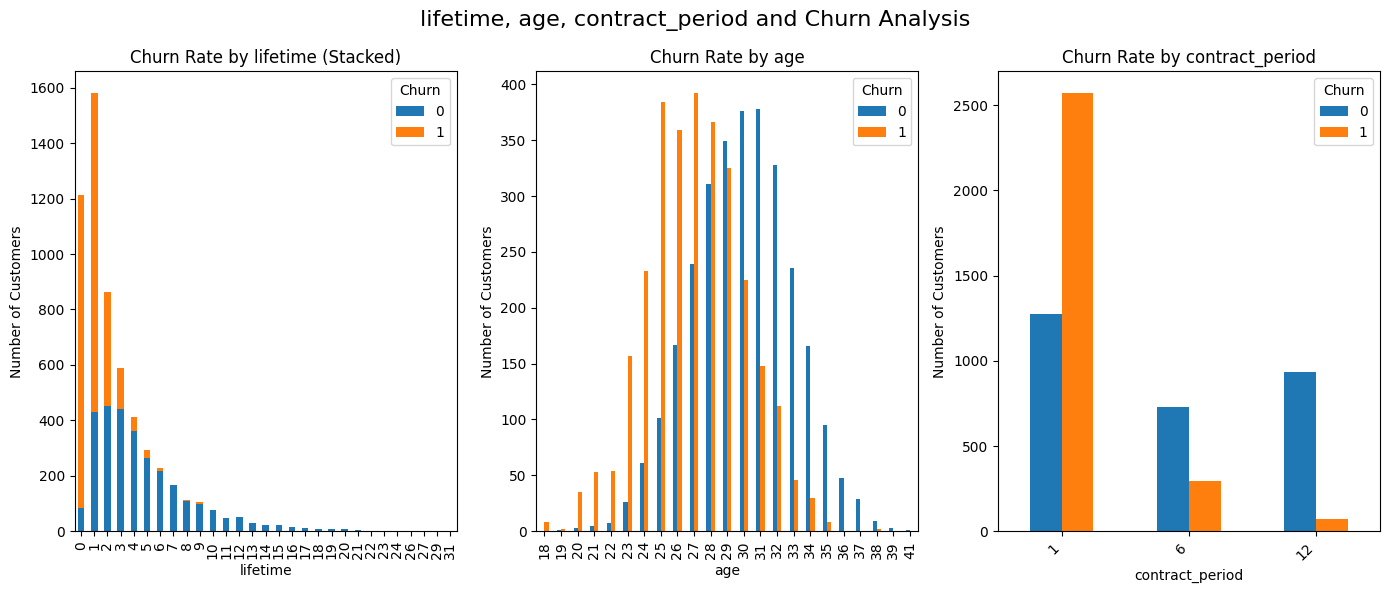

In [21]:
# Stacked Bar Chart: lifetime vs. Churn
lifetime_churn = df.groupby(['lifetime', target]).size().unstack()

# Stacked Bar Chart: age vs Churn
age_churn = df.groupby(['age', target]).size().unstack()

# Stacked Bar Chart: avg_class_frequency_current_month vs Churn
contract_period_churn = df.groupby(['contract_period', target]).size().unstack()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Stacked Bar Chart
lifetime_churn.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('lifetime')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Churn Rate by lifetime (Stacked)')
axes[0].legend(title='Churn', loc='upper right')

# Bar Chart
age_churn.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('age')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Churn Rate by age')
axes[1].legend(title='Churn', loc='upper right')
plt.xticks(rotation=45, ha='right')

contract_period_churn.plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('contract_period')
axes[2].set_ylabel('Number of Customers')
axes[2].set_title('Churn Rate by contract_period')
axes[2].legend(title='Churn', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Better layout
fig.suptitle('lifetime, age, contract_period and Churn Analysis', fontsize=16)
plt.tight_layout()
plt.show()

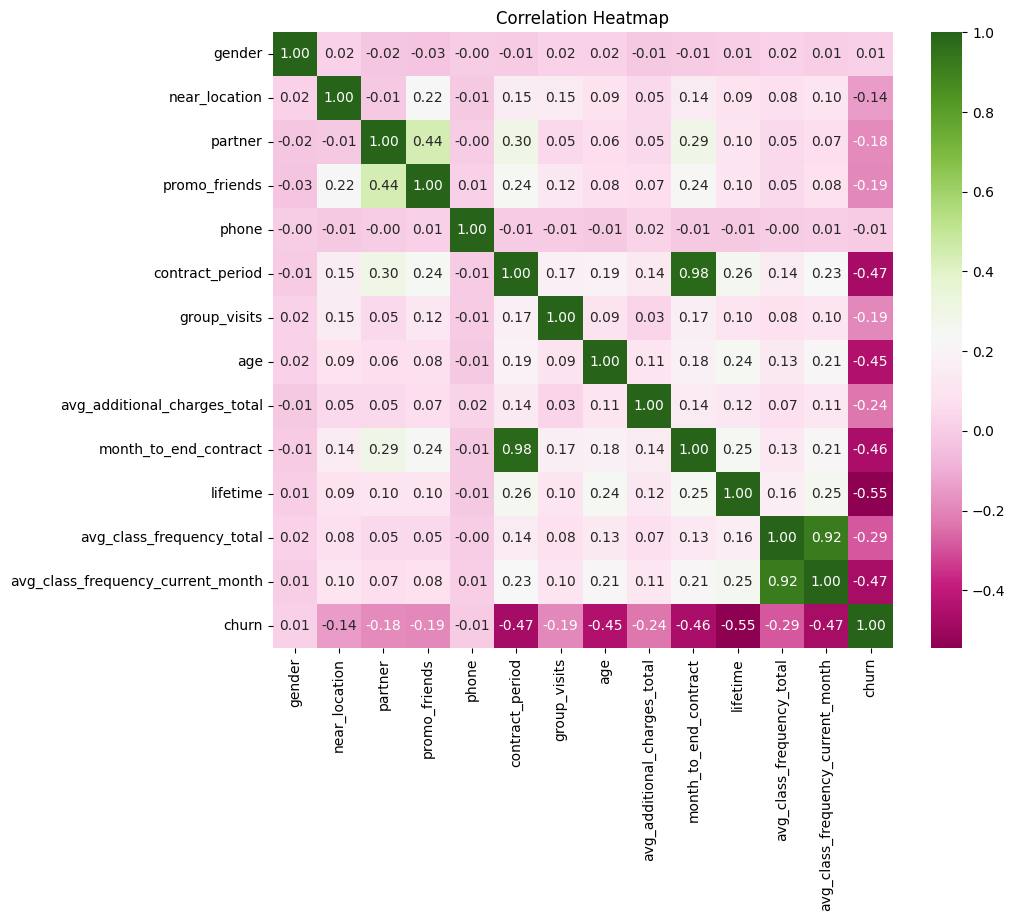

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
correlation_matrix['churn'].sort_values(ascending=False)

churn                                1.000000
gender                               0.011574
phone                               -0.006290
near_location                       -0.142068
partner                             -0.184271
promo_friends                       -0.191103
group_visits                        -0.192635
avg_additional_charges_total        -0.237508
avg_class_frequency_total           -0.287745
age                                 -0.447190
month_to_end_contract               -0.462556
avg_class_frequency_current_month   -0.471457
contract_period                     -0.474256
lifetime                            -0.545484
Name: churn, dtype: float64

Columns with very low correlation:
gender (0.011574)
phone (-0.006290)
These columns have very low correlation with 'churn'

In [24]:
df = df.drop(['gender','phone'],axis=1)
df.head()

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,1,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [26]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train['churn'].values
y_test = df_test['churn'].values
y_val = df_val['churn'].values

x_train = df_train.drop(['churn'],axis=1)
x_test = df_test.drop(['churn'],axis=1)
x_val = df_val.drop(['churn'],axis=1)

del df_train['churn']
del df_test['churn']
del df_val['churn']

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

In [27]:
%pip install imbalanced-learn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42,n_jobs=-1),
        'params':{
            'max_depth':[1,3,5,7,9],
            'n_estimators':[10,50,100,200,500],
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params':{
            'n_estimators':[10,50,100,200,500],
            'learning_rate':[0.01,0.1,1,10],
        }
    },
    'Ada Boost': {
        'model': AdaBoostClassifier(random_state=42),
        'params':{
            'n_estimators':[10,50,100,200,500],
            'learning_rate':[0.01,0.1,1,10],
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42),
        'params':{
            'n_estimators':[10,50,100,200,500],
            'learning_rate':[0.01,0.1,1,10],
        }
    },
    'BalancedRandomForestClassifier':{
        'model':BalancedRandomForestClassifier(random_state=42,n_jobs=-1),
        'params':{
            'max_depth':[1,3,5,7,9],
            'n_estimators':[10,50,100,200,500],
        }
    }

}

results = []
for model_name,model_params in models.items():
    grid_search = GridSearchCV(model_params['model'],model_params['params'],
                              scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
    grid_search.fit(x_train,y_train)
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    results.append({
        'Model': model_name,
        'Best Accuracy': best_accuracy,
        'Best Params': best_params
    })

results_df = pd.DataFrame(results)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


d:\downloads\my_anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


d:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
d:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
d:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


In [35]:
scores = []
for model_name,model_params in models.items():
    random_search = RandomizedSearchCV(model_params['model'],model_params['params'],
                              scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
    random_search.fit(x_train,y_train)
    best_params = random_search.best_params_
    best_accuracy = random_search.best_score_
    scores.append({
        'Model': model_name,
        'Best Accuracy': best_accuracy,
        'Best Params': best_params
    })

scores_df = pd.DataFrame(scores)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\downloads\my_anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
d:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
d:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


In [34]:
results_df


,Model,Best Accuracy,Best Params
0,Random Forest,0.939590,"{'max_depth': 9, 'n_estimators': 50}"
1,Gradient Boosting,0.963131,"{'learning_rate': 0.1, 'n_estimators': 500}"
2,Ada Boost,0.926548,"{'learning_rate': 1, 'n_estimators': 500}"
3,XGBoost,0.958876,"{'learning_rate': 0.1, 'n_estimators': 200}"
4,BalancedRandomForestClassifier,0.942426,"{'max_depth': 9, 'n_estimators': 200}"


In [ ]:
scores_df.sort_values(by='Best Accuracy',ascending=False)

,Model,Best Accuracy,Best Params
1,Gradient Boosting,0.963131,"{'n_estimators': 500, 'learning_rate': 0.1}"
3,XGBoost,0.952921,"{'n_estimators': 50, 'learning_rate': 1}"
4,BalancedRandomForestClassifier,0.942426,"{'n_estimators': 200, 'max_depth': 9}"
0,Random Forest,0.939307,"{'n_estimators': 100, 'max_depth': 9}"
2,Ada Boost,0.926548,"{'n_estimators': 500, 'learning_rate': 1}"


In [45]:
param_dict = {
    'n_estimators': [500],
    'max_depth': range(10,201,10),
    'learning_rate': [0.1],
    'min_samples_split': range(2,11),
    'min_samples_leaf': range(1,11),
    'max_features': ['sqrt','log2']
    }
random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42,verbose=1),
                                   param_distributions=param_dict,
                              scoring='accuracy',cv=5,n_jobs=-1,
                              verbose=1)
random_search.fit(x_train,y_train)
best_params = random_search.best_params_
best_accuracy = random_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {best_accuracy}')
                                   

Fitting 5 folds for each of 10 candidates, totalling 50 fits
      Iter       Train Loss   Remaining Time 
         1           1.2397           16.97s
         2           1.1155           16.94s
         3           1.0174           18.05s
         4           0.9287           18.60s
         5           0.8501           18.91s
         6           0.7781           19.75s
         7           0.7145           19.86s
         8           0.6619           20.04s
         9           0.6158           20.02s
        10           0.5729           19.99s
        20           0.2935           20.04s
        30           0.1635           19.63s
        40           0.0938           19.24s
        50           0.0554           19.22s
        60           0.0335           18.82s
        70           0.0203           18.43s
        80           0.0124           18.16s
        90           0.0076           17.85s
       100           0.0046           17.58s
       200           0.0000           

In [46]:
best_params = {'n_estimators': 500, 
               'min_samples_split': 2, 
               'min_samples_leaf': 1, 
               'max_features': 'sqrt', 
               'max_depth': 10, 'learning_rate': 0.1}

gbm = GradientBoostingClassifier(random_state=42,verbose=1)
gbm.set_params(**best_params)
gbm.fit(x_train,y_train)
y_pred = gbm.predict(x_val)
accuracy = accuracy_score(y_val,y_pred)
roc_auc = roc_auc_score(y_val,y_pred)
mean_squared = mean_squared_error(y_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')
print(f'Mean Squared Error: {mean_squared}')

      Iter       Train Loss   Remaining Time 
         1           1.2187           23.01s
         2           1.0776           29.72s
         3           0.9588           28.87s
         4           0.8550           30.42s
         5           0.7694           30.91s
         6           0.6980           30.33s
         7           0.6322           30.17s
         8           0.5737           30.92s
         9           0.5213           31.17s
        10           0.4727           31.04s
        20           0.1994           30.49s
        30           0.0971           31.58s
        40           0.0519           30.07s
        50           0.0295           29.00s
        60           0.0177           27.72s
        70           0.0112           26.38s
        80           0.0072           25.33s
        90           0.0046           24.10s
       100           0.0030           23.05s
       200           0.0000           16.14s
       300           0.0000           10.30s
       40

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred)
cm

array([[533,  31],
       [  7, 605]], dtype=int64)

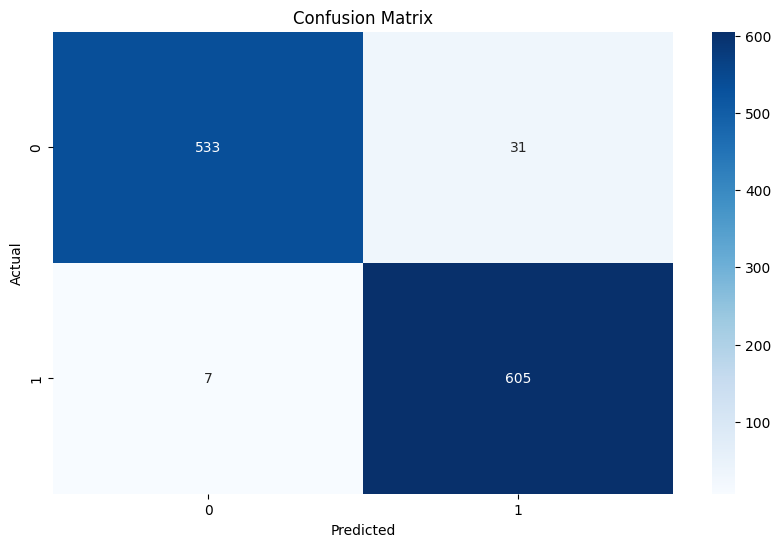

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
y_train_pred = gbm.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1772,    0],
       [   0, 1754]], dtype=int64)

In [50]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 100.0%


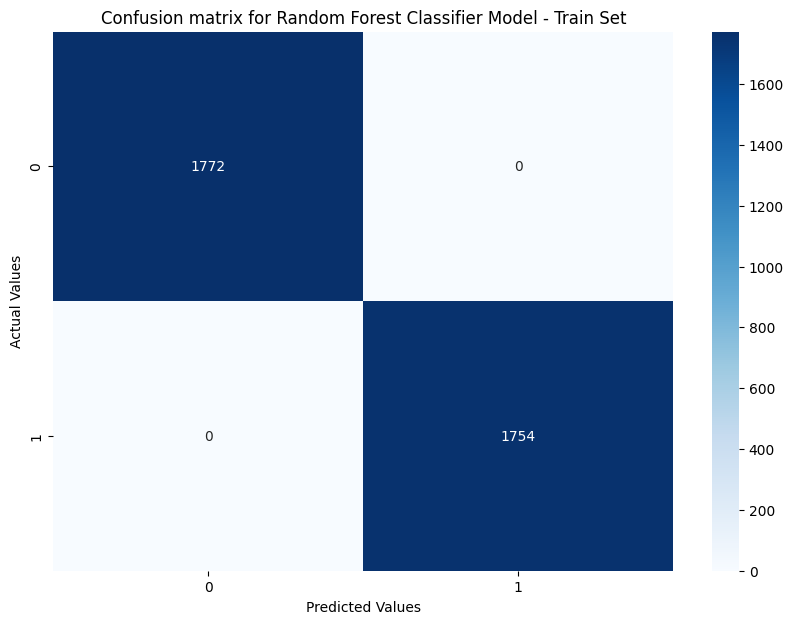

In [51]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [57]:
train_dicts[2]

{'near_location': 1,
 'partner': 0,
 'promo_friends': 0,
 'contract_period': 1,
 'group_visits': 1,
 'age': 19,
 'avg_additional_charges_total': 162.87335365115177,
 'month_to_end_contract': 1.0,
 'lifetime': 0,
 'avg_class_frequency_total': 0.8270577777709461,
 'avg_class_frequency_current_month': 0.2403694529034241}

In [59]:
person = {'near_location': 1,
 'partner': 0,
 'promo_friends': 0,
 'contract_period': 1,
 'group_visits': 1,
 'age': 29,
 'avg_additional_charges_total': 264.60551415647086,
 'month_to_end_contract': 1.0,
 'lifetime': 0,
 'avg_class_frequency_total': 2.355562612407676,
 'avg_class_frequency_current_month': 2.3723301792604268
 }

x = dv.transform([train_dicts[2]])
y_pred = gbm.predict(x)
print("churn probability: ", y_pred[0])

if y_pred[0] == 0:
    print("Customer will not churn")
else:
    print("Customer will churn")

churn probability:  1
Customer will churn


In [54]:
df.head(1)

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,6,1,29,14.22747,5.0,3,0.020398,0.0,0


In [58]:
df.loc[df['age']==19]

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2617,1,0,0,1,1,19,248.687182,1.0,0,0.998505,0.836992,0
376,1,0,0,1,1,19,162.873354,1.0,0,0.827058,0.240369,1
376,1,0,0,1,1,19,162.873354,1.0,0,0.827058,0.240369,1
